Data and Feature Engineering

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('proj2dataset.csv')

In [4]:
nltk.download('punkt')
dataset['tokenized_text'] = dataset['comment_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(dataset['comment_text'])

In [6]:
X = tfidf_matrix
y = dataset.drop(columns=['id', 'comment_text'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_label_sums = y_train.sum()
plt.figure(figsize=(10, 6))
train_label_sums.plot(kind='bar')
plt.title('Train Label Frequency')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

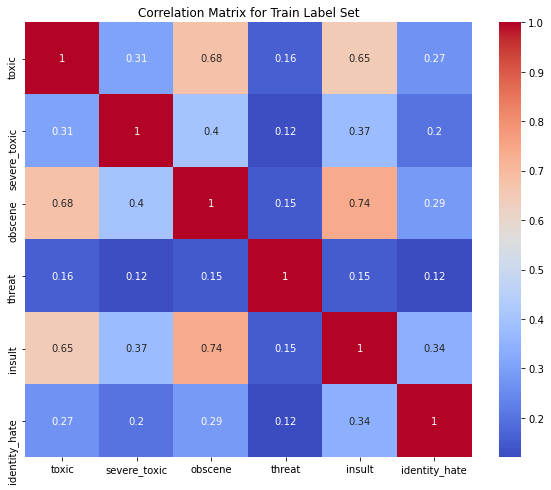

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(y_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Train Label Set')
plt.show()

Modeling and Evaluation

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier

In [9]:
X = dataset['comment_text']
Y = dataset['toxic']
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2)

In [11]:
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Linear SVC": LinearSVC()
}

Multinomial Naive Bayes - Accuracy: 0.9482061726460912
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28870
           1       0.94      0.49      0.64      3045

    accuracy                           0.95     31915
   macro avg       0.94      0.74      0.81     31915
weighted avg       0.95      0.95      0.94     31915



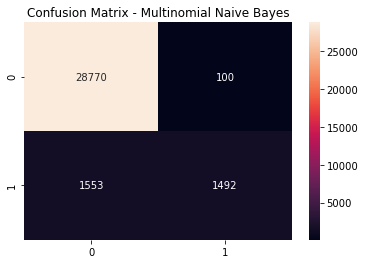

C:\Users\baseb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.9577314742284192
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28870
           1       0.91      0.62      0.74      3045

    accuracy                           0.96     31915
   macro avg       0.93      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



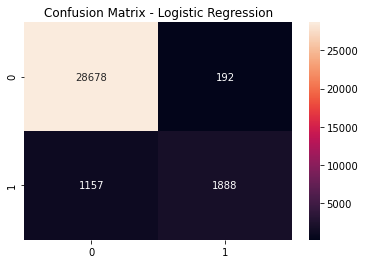

Linear SVC - Accuracy: 0.9594234685884381
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28870
           1       0.88      0.67      0.76      3045

    accuracy                           0.96     31915
   macro avg       0.92      0.83      0.87     31915
weighted avg       0.96      0.96      0.96     31915



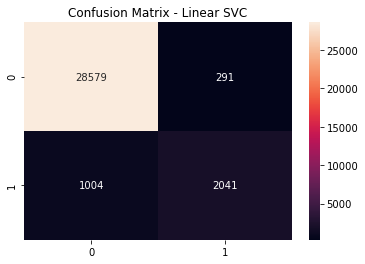

In [12]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(Y_test, Y_pred)}")
    print(classification_report(Y_test, Y_pred))
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [13]:
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()])
voting_clf.fit(X_train, Y_train)
voting_pred = voting_clf.predict(X_test)
print("Ensemble Method (Voting Classifier) - Accuracy:", accuracy_score(Y_test, voting_pred))

C:\Users\baseb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Method (Voting Classifier) - Accuracy: 0.9583894720350932


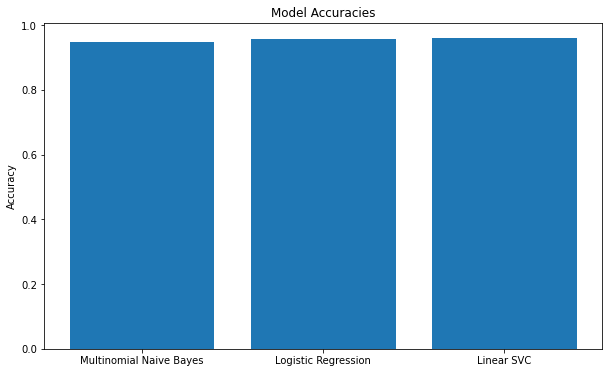

In [14]:
accuracies = [accuracy_score(Y_test, model.predict(X_test)) for model in models.values()]
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

LSTM

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [16]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(dataset['comment_text'])
sequences = tokenizer.texts_to_sequences(dataset['comment_text'])

In [17]:
X = pad_sequences(sequences, maxlen=10)
Y = dataset['toxic']

In [18]:
model = Sequential()
model.add(Embedding(10000, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X, Y, epochs=4, batch_size=32)

Epoch 1/4
4987/4987 [==============================] - 178s 35ms/step - loss: 0.1717 - accuracy: 0.9450
Epoch 2/4
4987/4987 [==============================] - 174s 35ms/step - loss: 0.1428 - accuracy: 0.9510
Epoch 3/4
4987/4987 [==============================] - 176s 35ms/step - loss: 0.1267 - accuracy: 0.9547
Epoch 4/4
4987/4987 [==============================] - 175s 35ms/step - loss: 0.1108 - accuracy: 0.9597


In [25]:
test_comments = ["I love you", "I hate you", "You're ugly", "You suck at video games", "I think you're talented"]  
test_sequences = tokenizer.texts_to_sequences(test_comments)
test_padded = pad_sequences(test_sequences, maxlen=10)

In [26]:
predictions = model.predict(test_padded)
for comment, prediction in zip(test_comments, predictions):
    print(f"Comment: {comment} - Toxicity Probability: {prediction[0]}")

1/1 [==============================] - 0s 16ms/step
Comment: I love you - Toxicity Probability: 0.11069218814373016
Comment: I hate you - Toxicity Probability: 0.9261375069618225
Comment: You're ugly - Toxicity Probability: 0.9556200504302979
Comment: You suck at video games - Toxicity Probability: 0.9907857775688171
Comment: I think you're talented - Toxicity Probability: 0.12942755222320557


In [28]:
model.save('lstm_model.h5')